# **PROJECT NAME :** **UNEMPLOYMENT Analysis**

This project analyzes the unemployment scenario before and after the COVID-19 lockdown using Python. It includes data analysis, visualizations, and insights derived from the provided dataset.The dataset used for this analysis, contains information about unemployment rates, employment, labor participation, and other relevant factors for different states and regions.


## Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd

import calendar
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

##Loading Dataset

In [ ]:
# Loading Dataset
df = pd.read_csv('/content/drive/MyDrive/Oasis Infobyte/Project 2/Unemployment in India.csv')

##Understanding of Data / Data Inspection

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
print(f'No. of Rows: {df.shape[0]}')
print(f'No. of Columns: {df.shape[1]}')
df.shape

No. of Rows: 768
No. of Columns: 7


(768, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

## Data Cleaning

In [ ]:
# Check for missing values
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
null = df.loc[df['Region'].isna()]
null

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
null.shape

(28, 7)

Here, we can see that all the 28 records are null for each respective feature/attribute. So, it is better to drop these records.

In [ ]:
# Drop all null values
df.dropna(how= 'all', inplace= True)

In [ ]:
# Reseting the Index
df.sort_index(inplace= True)

## Data Formating

In [ ]:
# Rename columns for better readability

# df['Region'].rename('State', inplace= True)
df.columns = ['States', 'Date', 'Frequency',
       'Estimated Unemployment Rate', 'Estimated Employed',
       'Estimated Labour Participation Rate', 'Area']

In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst= True)

In [ ]:
# Convert 'State' column to a categorical variable
df['States'] = df['States'].astype('category')

In [ ]:
# Convert 'Frequency' column to a categorical variable
df['Frequency'] = df['Frequency'].astype('category')

In [ ]:
# Extract the month and year from the 'Date' column and create new columns
df['Year'] = df['Date'].dt.year
df['Month_int'] = df['Date'].dt.month
df['Month'] = df['Date'].dt.month
df['Month'] = df['Date'].dt.month.apply(lambda x: calendar.month_name[x])

## Exploratory Data Analysis

Data Analysis & Data Visualization

In [ ]:
# Descriptive Analysis
df.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Year
count,740.000000,7.400000e+02,740.000000,740.000000
mean,11.787946,7.204460e+06,42.630122,2019.418919
std,10.721298,8.087988e+06,8.111094,0.493716
min,0.000000,4.942000e+04,13.330000,2019.000000
25%,4.657500,1.190404e+06,38.062500,2019.000000
50%,8.350000,4.744178e+06,41.160000,2019.000000
75%,15.887500,1.127549e+07,45.505000,2020.000000
max,76.740000,4.577751e+07,72.570000,2020.000000


In [ ]:
# Descriptive Analysis of Object Dtype
df.describe(include= 'O')

,Area,Month
count,740,740
unique,2,12
top,Urban,May
freq,381,105


In [ ]:
df['States'].value_counts()

Andhra Pradesh      28
Karnataka           28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Maharashtra         28
Kerala              28
Madhya Pradesh      28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
West Bengal         28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: States, dtype: int64

In [ ]:
df['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

In [ ]:
df.groupby(['States', 'Area'])['Estimated Employed'].mean()

States            Area 
Andhra Pradesh    Rural    1.180859e+07
                  Urban    4.499592e+06
Assam             Rural    9.716618e+06
                  Urban    1.616048e+06
Bihar             Rural    2.184369e+07
                  Urban    2.888684e+06
Chandigarh        Rural             NaN
                  Urban    3.168312e+05
Chhattisgarh      Rural    6.501684e+06
                  Urban    2.105313e+06
Delhi             Rural    1.482493e+05
                  Urban    5.106776e+06
Goa               Rural    1.682461e+05
                  Urban    2.843706e+05
Gujarat           Rural    1.322675e+07
                  Urban    9.577275e+06
Haryana           Rural    4.649778e+06
                  Urban    2.464367e+06
Himachal Pradesh  Rural    1.897366e+06
                  Urban    2.222814e+05
Jammu & Kashmir   Rural    2.436790e+06
                  Urban    1.099388e+06
Jharkhand         Rural    6.762351e+06
                  Urban    2.176130e+06
Karnataka       

In [ ]:
# Correlation Matrix for Heatmap
corr_matrix = df.corr()
corr_matrix

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Year
Estimated Unemployment Rate,1.000000,-0.222876,0.002558,0.262602
Estimated Employed,-0.222876,1.000000,0.011300,-0.031841
Estimated Labour Participation Rate,0.002558,0.011300,1.000000,-0.182460
Year,0.262602,-0.031841,-0.182460,1.000000


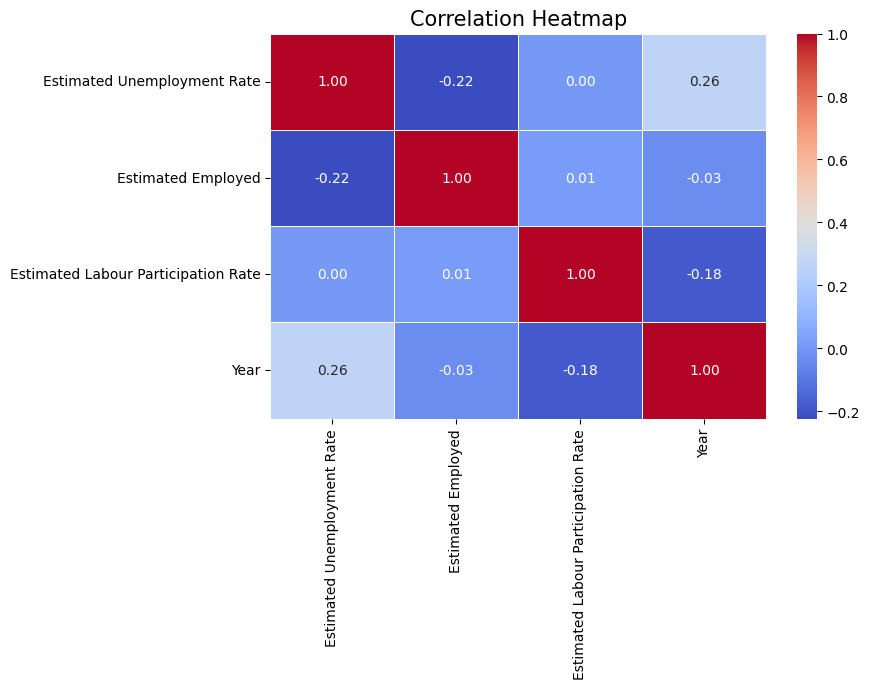

In [ ]:
# Correlation Heatmap
plt.figure(figsize= (8,5))
sns.heatmap(corr_matrix, annot= True, cmap= 'coolwarm', fmt= '.2f', linewidths= 0.5)

plt.title('Correlation Heatmap', fontsize= 15)
plt.show()

In [ ]:
# Create a box plot using Plotly Express
fig = px.box(df, x= 'States', y= 'Estimated Unemployment Rate', color= 'States', title= 'Unemployment rate',
             template= 'plotly')
fig.update_layout(xaxis= {'categoryorder' : 'total descending'})
fig.show()

In [ ]:
# Create a scatter matrix using Plotly Express
fig1 = px.scatter_matrix(df, dimensions= ['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate'],
                         color= 'States', template= 'plotly')
fig1.show()

In [ ]:
# Create a bar chart of average unemployment rate by state

''' df[['Estimated Unemployment Rate', 'States']].groupby(['States']).mean() '''
avg_unempl = df.groupby(['States'])['Estimated Unemployment Rate'].mean().reset_index().sort_values('Estimated Unemployment Rate', ascending= True)

fig2 = px.bar(avg_unempl, x= 'States', y= 'Estimated Unemployment Rate', color= 'States',
              title= 'Average Unemployment Rate in each state', template= 'plotly')
fig2.show()

In [ ]:
# Create an animated bar chart of unemployment rates by year and month
fig3 = px.bar(df, x= 'States', y= 'Estimated Unemployment Rate', animation_frame= 'Month', color= 'Year',
              title= 'Unemployment Rates by Month and Year', height= 700, template= 'plotly')
fig3.update_layout(xaxis= {'categoryorder' : 'total descending'})

# Set animation frame duration
fig3.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000
fig3.show()

In [ ]:
# Create a sunburst chart to visualize unemployment rates by area and state
avg_unempl_area = df.groupby(['Area', 'States'])['Estimated Unemployment Rate'].mean().reset_index()
fig4 = px.sunburst(avg_unempl_area, path= ['Area', 'States'], values= 'Estimated Unemployment Rate',
                   color_continuous_scale= 'plasma', title= 'Unemployment rate by each area and state',
                   height= 600, template= 'ggplot2')
fig4.show()

In [ ]:
# Create a scatter geo-map to visualize the impact of lockdown on employement
fig5 = px.scatter_geo(df, color= 'States', hover_name= 'States', size= 'Estimated Unemployment Rate', animation_frame= 'Month',
                      scope= 'asia', template= 'plotly', title= 'Impact of lockdown on employment across regions')

# Set animation frame duration
fig5.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000

# Update geographic axes range and appearance
fig5.update_geos(lataxis_range= [5,35], lonaxis_range= [65,100], oceancolor= '#6dd5ed', showocean= True)
fig5.show()

In [ ]:
# Analyze the impact of lockdown on unemployment rates

lock = df[(df['Month_int'] >= 4) & (df['Month_int'] <=7)]
bf_lock = df[(df['Month_int'] >= 1) & (df['Month_int'] <=4)]
g_lock = lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
g_bf_lock = bf_lock.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
g_lock['Unemployment Rate before lockdown'] = g_bf_lock['Estimated Unemployment Rate']
g_lock.columns = ['States','Unemployment Rate after lockdown','Unemployment Rate before lockdown']

# Calculate the percentage change in unemployment rates
g_lock['percentage change in unemployment'] = round((g_lock['Unemployment Rate after lockdown']
                                                     - g_lock['Unemployment Rate before lockdown']) / g_lock['Unemployment Rate before lockdown'],2)

# Sort the data by percentage change for plotting
plot_per = g_lock.sort_values('percentage change in unemployment')


In [ ]:
# Create a bar chart to visualize the percentage change in unemployment rates

fig = px.bar(plot_per, x='States',y='percentage change in unemployment',color='percentage change in unemployment',
            title='Percentage Change in Unemployment in Each State After Lockdown',template='ggplot2')
fig.show()

.

In [ ]:
# Define a function to categorize states based on the impact of lockdown

def sort_impact(x):
    if x <= 10:
        return 'Impacted States'
    elif x <= 20:
        return 'Hard Impacted States'
    elif x <= 30:
        return 'Harder Impacted States'
    elif x <= 40:
        return 'Hardest Impacted States'
    return x

In [ ]:
# Apply the sort_impact function to create a new column for impact status
plot_per['impact status'] = plot_per['percentage change in unemployment'].apply(lambda x: sort_impact(x))

In [ ]:
# Create a bar chart to visualize the impact of lockdown on employment across states

fig = px.bar(plot_per, y='States',x='percentage change in unemployment',color='impact status',
            title='Impact of Lockdown on Employment Across States',template='ggplot2',height=650)
fig.show()